# Creating and Backtesting Stochastic Oscillator Strategies

## Getting the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [2]:
pd.read_csv("EURUSD_ohlc.csv")

,Unnamed: 0,Open,High,Low,Close
0,2008-01-01,1.45905,1.47502,1.45885,1.47146
1,2008-01-02,1.47146,1.47812,1.46876,1.47510
2,2008-01-03,1.47504,1.48254,1.46958,1.47429
3,2008-01-05,1.47451,1.47559,1.47430,1.47465
4,2008-01-06,1.47465,1.47560,1.46586,1.46954
...,...,...,...,...,...
3806,2020-12-23,1.21873,1.22158,1.21774,1.21849
3807,2020-12-27,1.21892,1.22504,1.21812,1.22152
3808,2020-12-28,1.22145,1.22752,1.22086,1.22502
3809,2020-12-29,1.22508,1.23102,1.22495,1.23000


In [3]:
data = pd.read_csv("EURUSD_ohlc.csv", parse_dates = [0], index_col = 0)
data

,Open,High,Low,Close
2008-01-01,1.45905,1.47502,1.45885,1.47146
2008-01-02,1.47146,1.47812,1.46876,1.47510
2008-01-03,1.47504,1.48254,1.46958,1.47429
2008-01-05,1.47451,1.47559,1.47430,1.47465
2008-01-06,1.47465,1.47560,1.46586,1.46954
...,...,...,...,...
2020-12-23,1.21873,1.22158,1.21774,1.21849
2020-12-27,1.21892,1.22504,1.21812,1.22152
2020-12-28,1.22145,1.22752,1.22086,1.22502
2020-12-29,1.22508,1.23102,1.22495,1.23000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3811 entries, 2008-01-01 to 2020-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3811 non-null   float64
 1   High    3811 non-null   float64
 2   Low     3811 non-null   float64
 3   Close   3811 non-null   float64
dtypes: float64(4)
memory usage: 148.9 KB


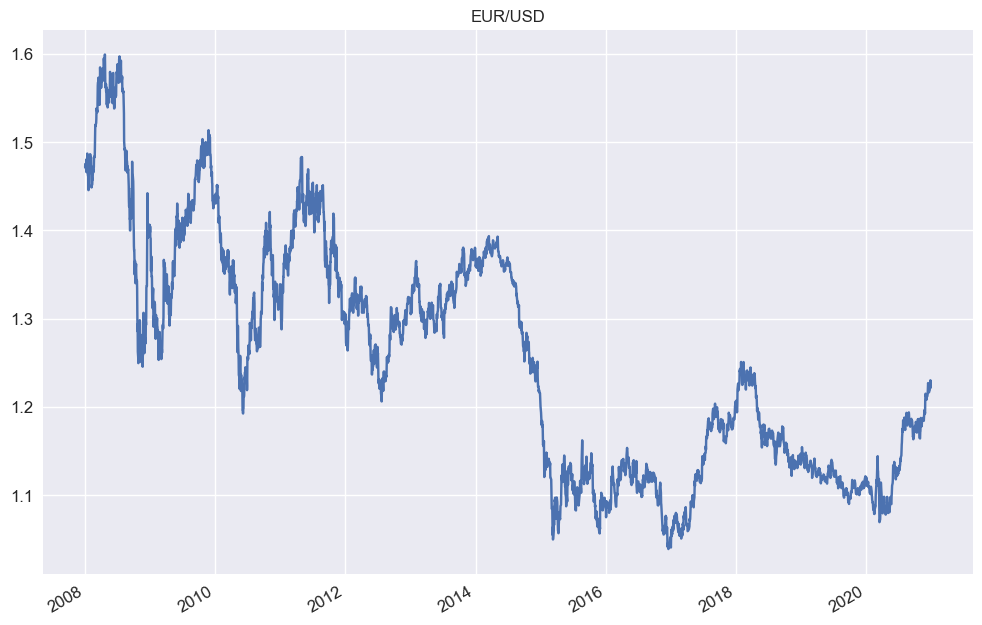

In [5]:
data.Close.plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12)
plt.show()